# Regression with synthetic data

## Imports

In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

## Data Generation

In [2]:
X, y = make_regression(n_samples=30000, n_features=120)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Baselines
### Linear

In [4]:
%%time
reg = LinearSVR(dual=True)
reg.fit(X_train, y_train)

Wall time: 59 ms


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [5]:
pred = reg.predict(X_test)
mean_squared_error(y_test,pred)

9.005241654148815e-22

### Radial Basis Function

In [6]:
%%time
reg_rbf = SVR(kernel='rbf')
reg_rbf.fit(X_train, y_train)

Wall time: 1min 3s


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [7]:
pred_rbf = reg_rbf.predict(X_test)
mean_squared_error(y_test,pred_rbf)

22065.740532108248

## Nystrom

In [8]:
%%time
from rkhs.nystrom import PlainNystrom
nys = PlainNystrom()
Z_train = nys.fit_transform(X_train)
Z_test = nys.transform(X_test)
from sklearn.linear_model import SGDRegressor
reg_nys = SGDRegressor(fit_intercept=False, max_iter=10000)
reg_nys.fit(Z_train, y_train)
pred_nys = reg_nys.predict(Z_test)
print(mean_squared_error(y_test, pred_nys))

11833.788467767843
Wall time: 16.5 s


In [9]:
from tqdm import tqdm
scores_test = list()
scores_train = list()
ms = list()
for m in tqdm(range(10, len(X_train), 200)):
    from rkhs.nystrom import PlainNystrom
    nys = PlainNystrom(m=m)
    Z_train = nys.fit_transform(X_train)
    Z_test = nys.transform(X_test)
    from sklearn.linear_model import SGDRegressor
    reg_nys = SGDRegressor(fit_intercept=True, max_iter=10000)
    reg_nys.fit(Z_train, y_train)
    pred_nys = reg_nys.predict(Z_test)
    scores_test.append(mean_squared_error(y_test, pred_nys))
    scores_train.append(mean_squared_error(y_train, reg_nys.predict(Z_train)))
    ms.append(m)

 31%|██████▊               | 35/113 [07:58<23:05, 17.77s/it]

KeyboardInterrupt: 

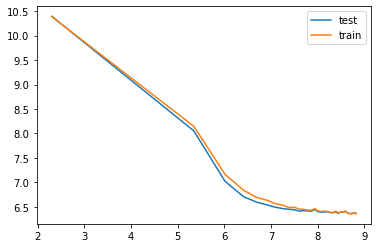

In [11]:
import matplotlib.pyplot as plt
plt.plot(np.log(ms), np.log(scores_test), label="test")
plt.plot(np.log(ms), np.log(scores_train), label="train")
plt.legend()

In [ ]:
raise Exception

In [12]:
scores_test

[32738.69202914939,
 3137.313250763849,
 1118.517291095986,
 817.0158793833656,
 729.6453626987745,
 690.0243325767944,
 658.4656202758933,
 640.5437295730848,
 631.457434373145,
 625.5437846076861,
 608.4692080258757,
 614.5328985149182,
 610.4173145219728,
 607.5791535237007,
 628.7054364091537,
 601.240478551388,
 596.0036373387901,
 598.3956308318856,
 601.4517257806357,
 592.7782176260617,
 587.9522592129217,
 590.7633973956349,
 600.1494039597352,
 581.1500555314243,
 593.2185588455649,
 595.9296970746053,
 595.9558913622906,
 605.320418299566,
 589.3992221229993,
 579.9234368116853,
 578.9755572218994,
 579.751823671444,
 583.4891441173742,
 589.6959629450428,
 579.5719973829359]

# Classification with synthetic data
## Imports

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

## Data Generation

In [ ]:
X, y = make_classification(n_samples=20000, n_features=120, n_informative=50, n_classes=5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Baselines
### Linear

In [ ]:
%%time
clf = LinearSVC(dual=X_train.shape[0] <= X_train.shape[1])
clf.fit(X_train, y_train)

In [ ]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

### Radial Basis Function

In [ ]:
%%time
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)

In [ ]:
pred_rbf = clf_rbf.predict(X_test)
accuracy_score(y_test,pred_rbf)

## Nystrom

In [ ]:
%%time
from rkhs.nystrom import PlainNystrom
nys = PlainNystrom()
Z_train = nys.fit_transform(X_train)
Z_test = nys.transform(X_test)

In [ ]:
print(Z_test.shape)

In [ ]:
%%time
from sklearn.linear_model import SGDClassifier
clf_nys = SGDClassifier(fit_intercept=False, max_iter=10000)
clf_nys.fit(Z_train, y_train)

In [ ]:
pred_nys = clf_nys.predict(Z_test)
accuracy_score(y_test, pred_nys)

## FALKON

In [5]:
from rkhs.nystrom import FALKON

In [8]:
reg_falkon = FALKON(n_iter=200)
reg_falkon.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FALKON(kernel=None, lambda_reg=1e-06, m=None, n_iter=200)

In [9]:
pred_falkon = reg_falkon.predict(X_test)
mean_squared_error(y_test, pred_falkon)

9084.35228212676